In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(v) for v in words)

2

In [5]:
max(len(v) for v in words)

15

# Bigram Model

We will use the immediately preceeding character to predict the current character.
So in each word we can mutlitple training examples by grouping consecutive letters into a training example. Also we have additional information that we can use, like which character is most likely to start and which character will cause the name to end. We can use this information by including a start \<S> and end \<E> character to create additional examples


In [6]:
b = {}

for w in words:
    chs = ['<S>'] + list(w) + [ '<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key=lambda x: x[1], reverse=True)

In [9]:
import torch

In [41]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [33]:
N.dtype

torch.int32

In [34]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [42]:
for w in words:
    chs = ['.'] + list(w) + [ '.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [38]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

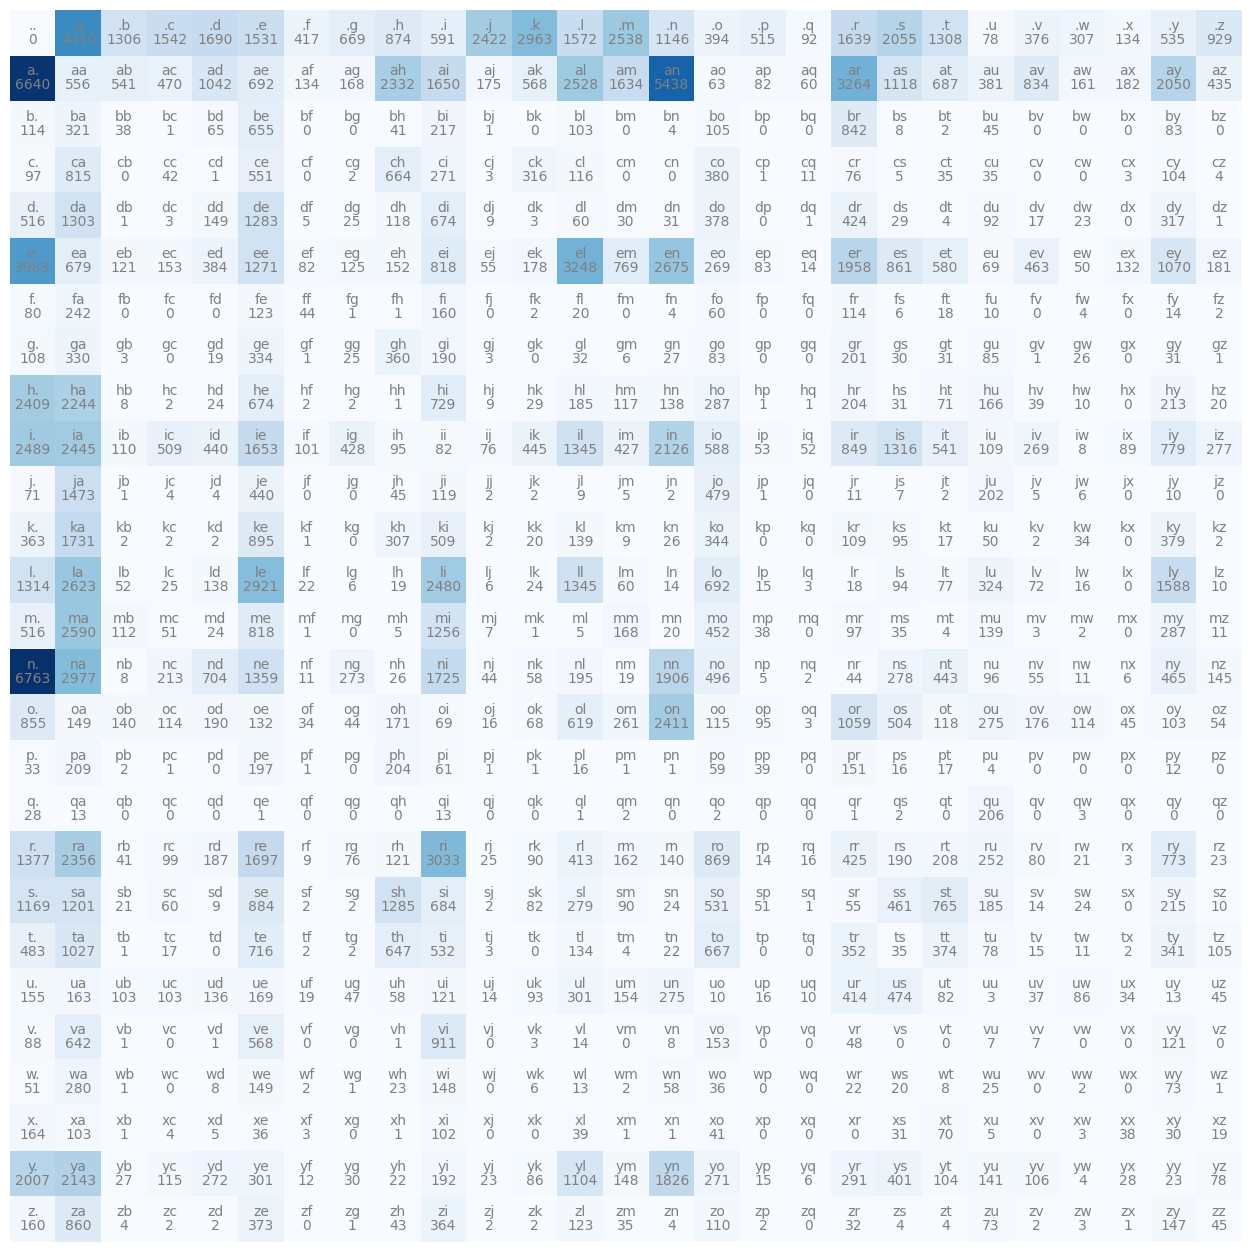

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [47]:
P = N

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

P = N / N.sum(0)

In [85]:
P /= P.sum(1, keepdim=True)

# Inplace operation is faster than P = P/P.sum

In [88]:
p = p / p.sum()

In [89]:
p

tensor([0.1960, 0.0164, 0.0160, 0.0139, 0.0308, 0.0204, 0.0040, 0.0050, 0.0688,
        0.0487, 0.0052, 0.0168, 0.0746, 0.0482, 0.1605, 0.0019, 0.0024, 0.0018,
        0.0963, 0.0330, 0.0203, 0.0112, 0.0246, 0.0048, 0.0054, 0.0605, 0.0128])

In [97]:
generator = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=generator).item()
itos[ix]

'd'

In [95]:
ix = 0
g = torch.Generator().manual_seed(2147483647)
generator = torch.Generator().manual_seed(2147483647)
for i in range(10):
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        print(itos[ix], end='')
        if ix == 0:
            break
    print()

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [ ]:
ix = 0
g = torch.Generator().manual_seed(2147483647)
generator = torch.Generator().manual_seed(2147483647)
for i in range(10):
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        print(itos[ix], end='')
        if ix == 0:
            break
    print()